In [ ]:
!pip install pennylane torch scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.1 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

In [ ]:
!pip show qiskit


In [ ]:
!pip install qiskit-machine-learning


In [ ]:
!pip install qiskit_machine_learning

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [ ]:
# --- Dataset: Imagens de Dígitos (8x8) ---
digits = load_digits()
X = digits.data           # shape: (n_samples, 64)
y = digits.target         # labels: 0–9

y_binary = (y >= 5).astype(int)  # Classe 0: dígitos 0-4, Classe 1: dígitos 5-9

In [ ]:
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(X)

In [ ]:
# --- Normalizar para usar com AmplitudeEmbedding ---
X_normed = []
for vec in X_reduced:
    norm = np.linalg.norm(vec)
    X_normed.append(vec / norm if norm != 0 else vec)
X_normed = np.array(X_normed)

In [ ]:
# --- Dividir em treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X_normed, y_binary, test_size=0.3, random_state=42)

In [ ]:
# --- Conversão para Tensor ---
X_train = torch.tensor(X_train, dtype=torch.float64)
y_train = torch.tensor(y_train, dtype=torch.float64).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float64)
y_test = torch.tensor(y_test, dtype=torch.float64).unsqueeze(1)

In [ ]:
# --- Configurações do circuito quântico ---
n_qubits = 3  # 2^3 = 8
depth = 2

In [ ]:
dev = qml.device("default.qubit", wires=n_qubits)

In [ ]:
def circuit(x, weights):
    qml.AmplitudeEmbedding(x, wires=range(n_qubits), normalize=True)
    for d in range(depth):
        for i in range(n_qubits):
            qml.RY(weights[d, i, 0], wires=i)
            qml.RZ(weights[d, i, 1], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
    return qml.expval(qml.PauliZ(0))

qnode = qml.QNode(circuit, dev, interface="torch")

In [ ]:
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn((depth, n_qubits, 2), dtype=torch.float64) * 0.1)
        self.linear = nn.Linear(1, 1, dtype=torch.float64)

    def forward(self, x):
        out = torch.stack([qnode(xi, self.weights) for xi in x])
        return torch.sigmoid(self.linear(out.unsqueeze(1)))

In [ ]:
model = QuantumClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
loss_fn = nn.BCELoss()

In [ ]:
n_epochs = 30
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f"Epoch {epoch:2d} - Loss: {loss.item():.4f}")

Epoch  5 - Loss: 0.7204
Epoch 10 - Loss: 0.6944
Epoch 15 - Loss: 0.6734
Epoch 20 - Loss: 0.6474
Epoch 25 - Loss: 0.6150
Epoch 30 - Loss: 0.5853



🔍 Acurácia no teste: 72.04%


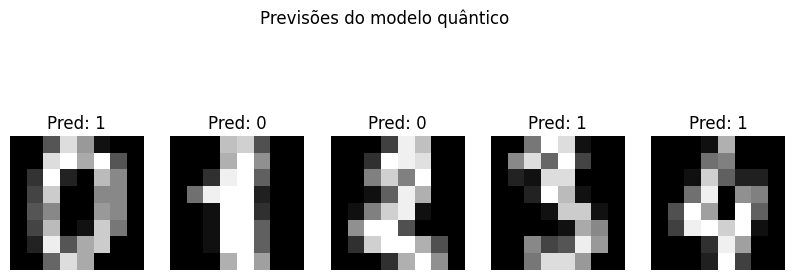

In [ ]:
with torch.no_grad():
    y_pred_test = model(X_test).numpy()
    y_pred_labels = (y_pred_test > 0.5).astype(int)
    acc = np.mean(y_pred_labels == y_test.numpy())
    print(f"\n🔍 Acurácia no teste: {acc*100:.2f}%")

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap="gray")
    plt.title(f"Pred: {int(y_pred_labels[i][0])}")
    plt.axis("off")
plt.suptitle("Previsões do modelo quântico")
plt.show()

In [ ]:
n_qubits = 3  # = 8 dimensões
n_features = 2**n_qubits

In [ ]:
np.random.seed(42)
X = np.random.rand(100, n_features)
X = normalize(X, axis=1)

In [ ]:
# Saída contínua (valor alvo de regressão)
y = np.sin(X[:, 0] * np.pi) + 0.1 * np.random.randn(100)

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
dev = qml.device("default.qubit", wires=n_qubits)

In [ ]:
# Função para imprimir o estado quântico após o AmplitudeEmbedding
@qml.qnode(dev)
def print_amplitude_embedding_state(x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=False)
    return qml.state()


In [ ]:
sample_idx = 0
sample_input = X_train[sample_idx]

print("\nEstado quântico após Amplitude Embedding (vetor de estado):")
state = print_amplitude_embedding_state(sample_input)
print(np.round(state, 3))



Estado quântico após Amplitude Embedding (vetor de estado):
tensor([-0.2630+0.j, -0.3880+0.j,  0.2150+0.j,  0.1480+0.j,  0.2100+0.j,  0.0560+0.j,
         0.7290+0.j,  0.3650+0.j], dtype=torch.complex128)


In [ ]:
@qml.qnode(dev)
def quantum_regressor(x, weights):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=False)

    # Camada variacional (camada de entanglement e rotações)
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)

    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

    for i in range(n_qubits):
        qml.RZ(weights[n_qubits + i], wires=i)

    return qml.expval(qml.PauliZ(0))

In [ ]:
def predict(X, weights):
    return np.array([quantum_regressor(x, weights) for x in X])

In [ ]:
# Otimização
weights = np.random.randn(2 * n_qubits, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [ ]:
n_epochs = 50
losses = []

for epoch in range(n_epochs):
    def cost_fn(w):
        preds = predict(X_train, w)
        return np.mean((preds - y_train) ** 2)

    weights = opt.step(cost_fn, weights)
    loss = cost_fn(weights)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 1.7125
Epoch 10: Loss = 0.5061
Epoch 20: Loss = 0.1991
Epoch 30: Loss = 0.1535
Epoch 40: Loss = 0.1419



MSE no conjunto de teste: 0.1716


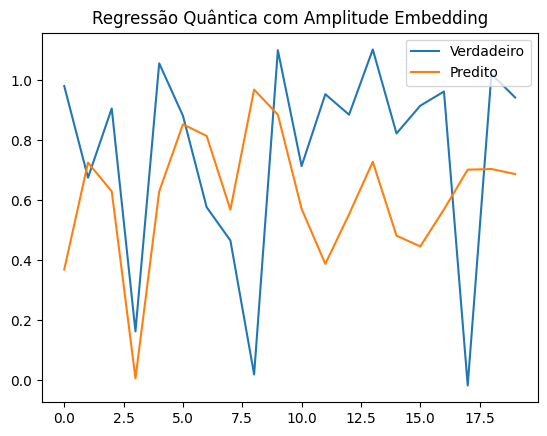

In [ ]:
y_pred = predict(X_test, weights)
mse = np.mean((y_pred - y_test) ** 2)
print(f"\nMSE no conjunto de teste: {mse:.4f}")

plt.plot(y_test, label="Verdadeiro")
plt.plot(y_pred, label="Predito")
plt.legend()
plt.title("Regressão Quântica com Amplitude Embedding")
plt.show()
